# 서울시 구별 CCTV 현황 분석
- 서울 자치구 년도별 CCTV 설치 현황
- 서울 주민등록인구(구별) 통계

In [1]:
!apt-get install -y fonts-nanum > /dev/null
!fc-cache -fv > /dev/null
!rm -rf ~/.cache/matplotlib > /dev/null
# 런타임 다시 시작

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rcParams['axes.unicode_minus'] = False
plt.rc('font', family='NanumBarunGothic')

### 1. CCTV 데이터 파악하고 정리하기

In [2]:
from google.colab import files
up = files.upload()

Saving 서울시CCTV설치운영현황(자치구)_년도별_210731기준.csv to 서울시CCTV설치운영현황(자치구)_년도별_210731기준.csv


In [4]:
filename = list(up.keys())[0]
cctv = pd.read_csv(filename, encoding='euc-kr', skiprows=1)
cctv.head(3)

,구분,총계,2012년 이전,2012년,2013년,2014년,2015년,2016년,2017년,2018년,2019년,2020년,2021년
0,계,"77,032","7,667","2,200","3,491","4,439","6,582","8,129","9,947","9,876","11,961","11,132","1,608"
1,종로구,"1,772",813,0,0,210,150,1,261,85,9,200,43
2,중 구,"2,333",16,114,87,77,236,240,372,386,155,361,289


In [5]:
# Null data 있는지 확인하기
cctv.isnull().sum().sum()

0

In [6]:
# 1000 단위 구분기호 없애고 정수로 변환하기
for column in cctv.columns[1:]:             # 총계 열부터 끝까지
    cctv[column] = cctv[column].str.replace(',','').astype(int)
    # cctv[column] = cctv[column].apply(lambda x: int(x.replace(',','')))

In [7]:
cctv.head(3)

,구분,총계,2012년 이전,2012년,2013년,2014년,2015년,2016년,2017년,2018년,2019년,2020년,2021년
0,계,77032,7667,2200,3491,4439,6582,8129,9947,9876,11961,11132,1608
1,종로구,1772,813,0,0,210,150,1,261,85,9,200,43
2,중 구,2333,16,114,87,77,236,240,372,386,155,361,289


In [8]:
# 2021년을 제외한 최근 3개년간의 CCTV 증가율 구하기
cctv['2017년_이전'] = cctv.총계 - cctv['2018년'] - cctv['2019년'] - cctv['2020년'] - cctv['2021년']
cctv['최근증가율'] = ((cctv['2018년']+cctv['2019년']+cctv['2020년']) / cctv['2017년_이전'] * 100).round(2)

In [9]:
# 구분, 총계, 최근증가율 컬럼만 추출하고 컬럼명을 구별, CCTV댓수로 변경하기
cctv = cctv[['구분', '총계','최근증가율']]
cctv.rename(columns={'구분':'구별', '총계':'CCTV댓수'}, inplace=True)
cctv.head()

,구별,CCTV댓수,최근증가율
0,계,77032,77.66
1,종로구,1772,20.49
2,중 구,2333,78.98
3,용산구,2383,78.64
4,성동구,3602,46.13


In [10]:
# 구 이름에서 공백지우기
cctv['구별'] = cctv.구별.str.replace(' ','')

In [11]:
# 첫번째 행 지우기
cctv.drop([0], inplace=True)
cctv.head()

,구별,CCTV댓수,최근증가율
1,종로구,1772,20.49
2,중구,2333,78.98
3,용산구,2383,78.64
4,성동구,3602,46.13
5,광진구,2588,112.29


### 2. 인구데이터 정리하기

In [12]:
from google.colab import files
up = files.upload()

Saving 서울시구별주민등록인구.txt to 서울시구별주민등록인구.txt


In [13]:
filename = list(up.keys())[0]
pop = pd.read_csv(filename, skiprows=2, sep='\t')
pop.head(3)

,기간,자치구,세대,계,남자,여자,계.1,남자.1,여자.1,계.2,남자.2,여자.2,세대당인구,65세이상고령자
0,2021.2/4,합계,"4,405,638","9,795,426","4,756,178","5,039,248","9,565,990","4,649,442","4,916,548","229,436","106,736","122,700",2.17,"1,576,971"
1,2021.2/4,종로구,"73,525","155,106","75,009","80,097","146,029","70,985","75,044","9,077","4,024","5,053",1.99,"27,605"
2,2021.2/4,중구,"62,897","132,259","64,526","67,733","123,016","60,019","62,997","9,243","4,507","4,736",1.96,"23,980"


In [14]:
# Null data 있는지 확인하기
pop.isnull().sum().sum()

0

In [15]:
# '자치구','계','계.1','계.2','65세이상고령자' 컬럼만 추출하고 이름을 변경
pop = pop[['자치구','계','계.1','계.2','65세이상고령자']]
pop.columns = ['구별','인구수','내국인','외국인','고령자']
pop.head(3)

,구별,인구수,내국인,외국인,고령자
0,합계,"9,795,426","9,565,990","229,436","1,576,971"
1,종로구,"155,106","146,029","9,077","27,605"
2,중구,"132,259","123,016","9,243","23,980"


In [16]:
# 1000 단위 구분기호 없애고 정수로 변환하기
for column in pop.columns[1:]:
    pop[column] = pop[column].str.replace(',','').astype(int)

In [17]:
# 첫번째 행 지우기
pop.drop([0], inplace=True)

In [18]:
# '외국인비율'과 '고령자비율' 컬럼 만들기
pop['외국인비율'] = (pop.외국인/pop.인구수*100).round(2)
pop['고령자비율'] = np.round(pop.고령자/pop.인구수*100, 2)
pop.head()

,구별,인구수,내국인,외국인,고령자,외국인비율,고령자비율
1,종로구,155106,146029,9077,27605,5.85,17.80
2,중구,132259,123016,9243,23980,6.99,18.13
3,용산구,240665,226378,14287,38884,5.94,16.16
4,성동구,295767,289162,6605,45591,2.23,15.41
5,광진구,355306,342481,12825,50815,3.61,14.30


### 3. CCTV 데이터와 인구 데이터 합치고 분석하기

- 데이터 병합

In [19]:
df = pd.merge(cctv, pop)
df.head()

,구별,CCTV댓수,최근증가율,인구수,내국인,외국인,고령자,외국인비율,고령자비율
0,종로구,1772,20.49,155106,146029,9077,27605,5.85,17.80
1,중구,2333,78.98,132259,123016,9243,23980,6.99,18.13
2,용산구,2383,78.64,240665,226378,14287,38884,5.94,16.16
3,성동구,3602,46.13,295767,289162,6605,45591,2.23,15.41
4,광진구,2588,112.29,355306,342481,12825,50815,3.61,14.30


In [20]:
# '구별' 컬럼을 인덱스로 만들기
df.set_index('구별', inplace=True)
df.head()

,CCTV댓수,최근증가율,인구수,내국인,외국인,고령자,외국인비율,고령자비율
구별,,,,,,,,
종로구,1772,20.49,155106,146029,9077,27605,5.85,17.80
중구,2333,78.98,132259,123016,9243,23980,6.99,18.13
용산구,2383,78.64,240665,226378,14287,38884,5.94,16.16
성동구,3602,46.13,295767,289162,6605,45591,2.23,15.41
광진구,2588,112.29,355306,342481,12825,50815,3.61,14.30


- 상관관계 분석

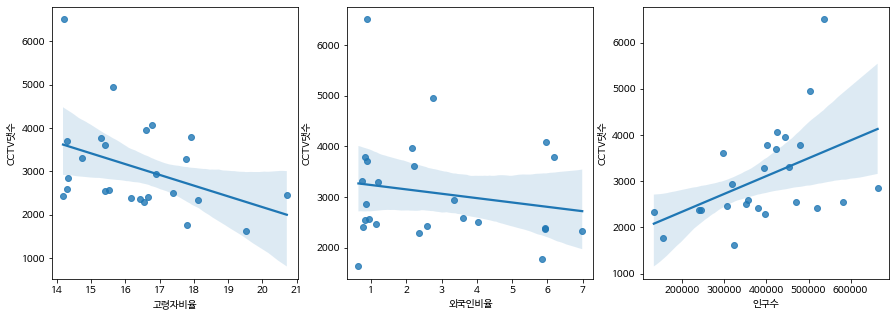

In [23]:
# '고령자비율', '외국인비율', '인구수' vs 'CCTV댓수'
fig, axs = plt.subplots(figsize=(15,5), ncols=3, nrows=1)
features = ['고령자비율','외국인비율','인구수']
for i, feature in enumerate(features):
    sns.regplot(x=feature, y='CCTV댓수', data=df, ax=axs[i])

- 구별 CCTV 댓수 비교

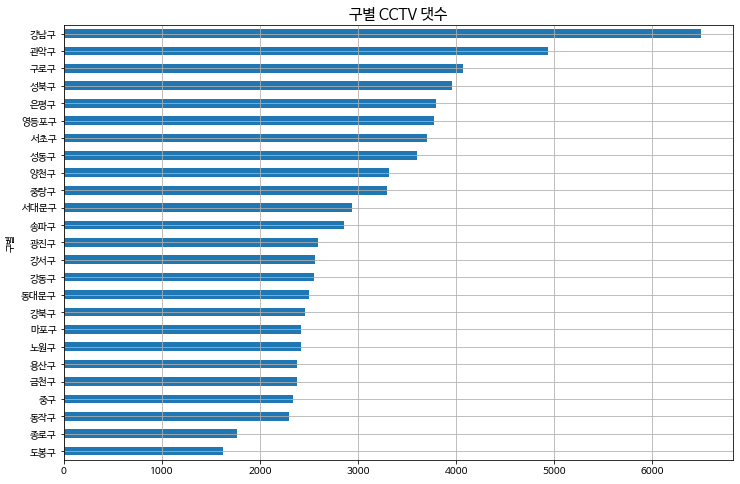

In [26]:
df.CCTV댓수.sort_values().plot(kind='barh', grid=True, figsize=(12,8)) 
plt.title('구별 CCTV 댓수', fontsize=15)
plt.show()

- 인구대비 CCTV 비율

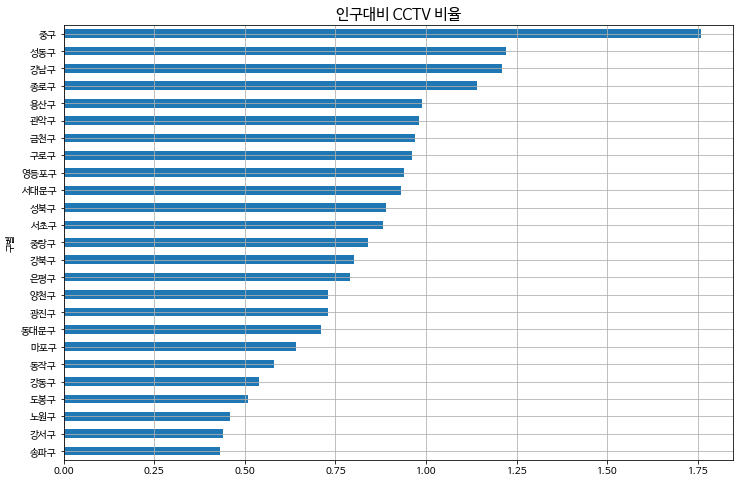

In [27]:
df['cctv비율'] = (df.CCTV댓수 / df.인구수 * 100).round(2) 
df.cctv비율.sort_values().plot(kind='barh', grid=True, figsize=(12,8))
plt.title('인구대비 CCTV 비율', fontsize=15)
plt.show()

### 4. 인구수와 CCTV 댓수 분석

- 산점도

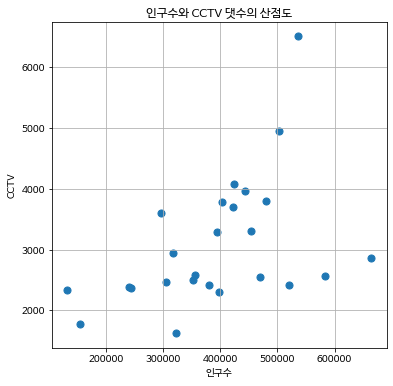

In [29]:
plt.figure(figsize=(6,6))
plt.scatter(df.인구수, df.CCTV댓수, s=50) 
plt.grid()
plt.title('인구수와 CCTV 댓수의 산점도')
plt.xlabel('인구수')
plt.ylabel('CCTV')
plt.show()

- 회귀선(상관 관계를 나타내는 선)

In [30]:
fp1 = np.polyfit(df.인구수, df.CCTV댓수, 1)
fp1                     # [기울기, 절편]

array([3.85119765e-03, 1.57231514e+03])

In [31]:
fx = np.array([100000, 700000])
fy = fx*fp1[0] + fp1[1]
fy

array([1957.43490106, 4268.1534916 ])

In [33]:
f1 = np.poly1d(fp1)
fy = f1(fx)
fy

array([1957.43490106, 4268.1534916 ])

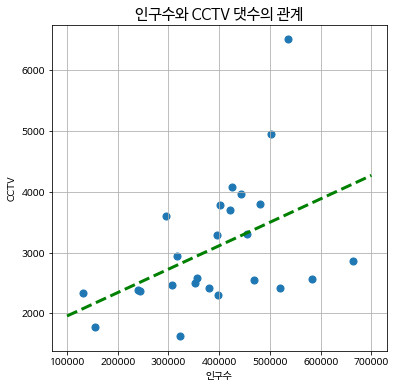

In [35]:
plt.figure(figsize=(6,6))
plt.scatter(df.인구수, df.CCTV댓수, s=50) 
plt.plot(fx, fy, 'g--', lw=3)
plt.grid()
plt.title('인구수와 CCTV 댓수의 관계', fontsize=15)
plt.xlabel('인구수')
plt.ylabel('CCTV')
plt.show()

In [36]:
# 오차를 계산하고, 오차의 내림차순으로 소팅된 데이터프레임 만들기
df['오차'] = abs(df.CCTV댓수 - f1(df.인구수)).round(2)
df_sort = df.sort_values('오차', ascending=False)
df_sort.head(10)

,CCTV댓수,최근증가율,인구수,내국인,외국인,고령자,외국인비율,고령자비율,cctv비율,오차
구별,,,,,,,,,,
강남구,6502,61.64,536107,531375,4732,76184,0.88,14.21,1.21,2865.03
관악구,4942,49.91,502698,488800,13898,78647,2.76,15.64,0.98,1433.70
송파구,2854,203.19,664341,658670,5671,95164,0.85,14.32,0.43,1276.82
강서구,2560,78.53,582995,577519,5476,90404,0.94,15.51,0.44,1257.54
도봉구,1629,82.82,322419,320365,2054,62894,0.64,19.51,0.51,1185.01
노원구,2415,66.38,520005,515997,4008,86697,0.77,16.67,0.46,1159.96
성동구,3602,46.13,295767,289162,6605,45591,2.23,15.41,1.22,890.63
구로구,4075,48.83,424582,399266,25316,71186,5.96,16.77,0.96,867.54
강동구,2547,112.25,469094,465209,3885,72275,0.83,15.41,0.54,831.89


- 최종 그림

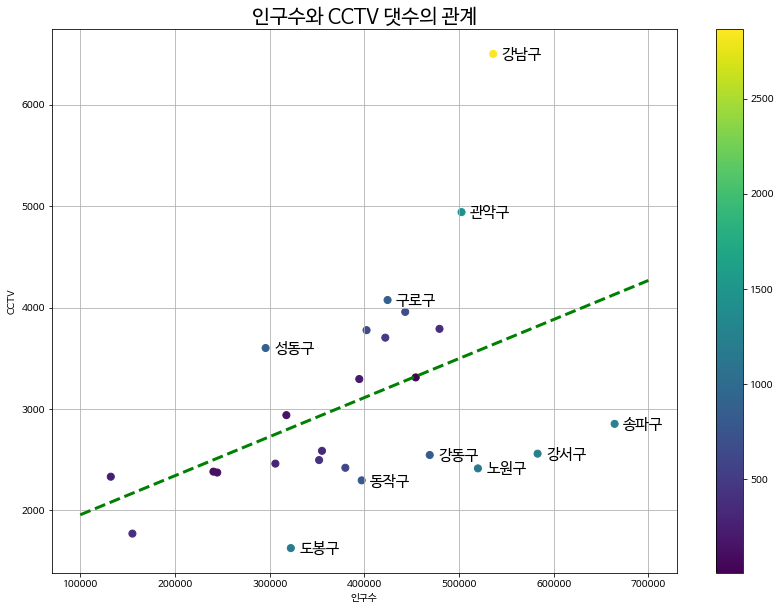

In [38]:
plt.figure(figsize=(14,10))
plt.scatter(df.인구수, df.CCTV댓수, c=df.오차, s=50)
plt.plot(fx, fy, 'g--', lw=3)

for i in range(10): 
    plt.text(df_sort.인구수[i]+9000, df_sort.CCTV댓수[i]-50,
             df_sort.index[i], fontsize=15)

plt.grid()
plt.title('인구수와 CCTV 댓수의 관계', fontsize=20)
plt.xlabel('인구수')
plt.ylabel('CCTV')
plt.colorbar()
plt.savefig('서울시_인구수와_CCTV댓수의_관계.png')

In [39]:
df.reset_index(inplace=True)
df.to_csv('서울시_인구수와_CCTV댓수.csv', index=False)

In [40]:
df2 = pd.read_csv('서울시_인구수와_CCTV댓수.csv')
df2.head()

,구별,CCTV댓수,최근증가율,인구수,내국인,외국인,고령자,외국인비율,고령자비율,cctv비율,오차
0,종로구,1772,20.49,155106,146029,9077,27605,5.85,17.80,1.14,397.66
1,중구,2333,78.98,132259,123016,9243,23980,6.99,18.13,1.76,251.33
2,용산구,2383,78.64,240665,226378,14287,38884,5.94,16.16,0.99,116.16
3,성동구,3602,46.13,295767,289162,6605,45591,2.23,15.41,1.22,890.63
4,광진구,2588,112.29,355306,342481,12825,50815,3.61,14.30,0.73,352.67
